In [33]:
from matplotlib import pyplot as plt

In [ ]:
import os 
import glob 
from tensorflow.python.summary.summary_iterator import summary_iterator

def get_section_results(logdir, tag="Eval_AverageReturn"):
    logdir = os.path.join(logdir, "./event*")
    eventfile = glob.glob(logdir)[0]
    X = []
    Y = []
    for e in summary_iterator(eventfile):
        for v in e.summary.value:
            if v.tag == 'Train_EnvstepsSoFar':
                X.append(v.simple_value)
            elif v.tag == tag:
                Y.append(v.simple_value)
    return X, Y

# X, Y = get_section_results(".")
# for i, (x, y) in enumerate(zip(X, Y)):
#     print('Iteration {:d} | Train steps: {:d} | Return: {}'.format(i, int(x), y))

In [25]:
# copy outputs into ./data
import shutil
def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

dest_dir = os.path.abspath("./data")

for f in glob.glob("./outputs/*/*/data/"):
    copytree(f, dest_dir)

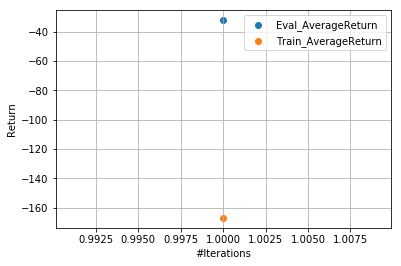

In [43]:
# problem 2
_, eval_return = get_section_results("./data/hw2_q2_obstacles_singleiteration_obstacles-ift6163-v0_17-02-2022_21-53-53")
_, train_return = get_section_results("./data/hw2_q2_obstacles_singleiteration_obstacles-ift6163-v0_17-02-2022_21-53-53", "Train_AverageReturn")

plt.scatter([1], eval_return, label='Eval_AverageReturn', )
plt.scatter([1], train_return, label='Train_AverageReturn')

plt.legend()
plt.grid(True)
plt.xlabel("#Iterations")
plt.ylabel("Return")
plt.show()

In [44]:
eval_return, train_return

([-32.14985275268555], [-167.09857177734375])

No handles with labels found to put in legend.


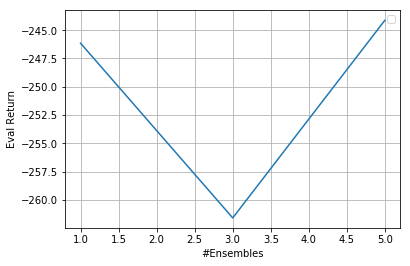

In [51]:
# problem 4
### ensemble 

_, en1 = get_section_results("./data/hw2_q4_reacher_ensemble1_reacher-ift6163-v0_17-02-2022_23-25-44")
_, en3 = get_section_results("./data/hw2_q4_reacher_ensemble3_reacher-ift6163-v0_17-02-2022_23-30-38")
_, en5 = get_section_results("./data/hw2_q4_reacher_ensemble5_reacher-ift6163-v0_17-02-2022_23-40-33")

plt.plot([1, 3, 5], [max(en1), max(en3), max(en5)])

plt.legend()
plt.grid(True)
plt.xlabel("#Ensembles")
plt.ylabel("Eval Return")
plt.show()

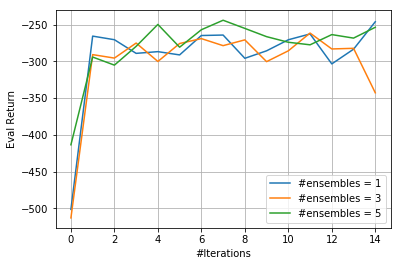

In [71]:
plt.plot(en1, label="#ensembles = 1")
plt.plot(en3, label="#ensembles = 3")
plt.plot(en5, label="#ensembles = 5")
plt.grid(True)
plt.legend()
plt.xlabel("#Iterations")
plt.ylabel("Eval Return")
plt.show()

No handles with labels found to put in legend.


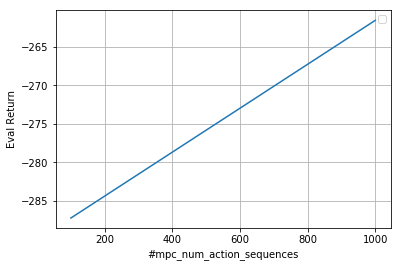

In [72]:
# problem 4
### num of candidate action sequences 

_, numseq100  = get_section_results("./data/hw2_q4_reacher_numseq100_reacher-ift6163-v0_17-02-2022_23-17-08")
_, numseq1000 = get_section_results("./data/hw2_q4_reacher_numseq1000_reacher-ift6163-v0_18-02-2022_01-52-53")

plt.plot([100, 1000], [max(numseq100), max(numseq1000)])

plt.legend()
plt.grid(True)
plt.xlabel("#mpc_num_action_sequences")
plt.ylabel("Eval Return")
plt.show()

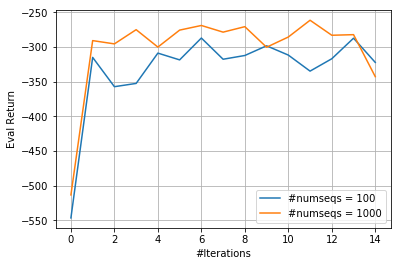

In [73]:
plt.plot(numseq100, label="#numseqs = 100")
plt.plot(numseq1000, label="#numseqs = 1000")
plt.grid(True)
plt.legend()
plt.xlabel("#Iterations")
plt.ylabel("Eval Return")
plt.show()

No handles with labels found to put in legend.


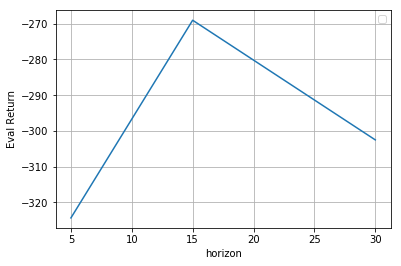

In [67]:
# problem 4
### planning horizon 

_, horizon5   = get_section_results("./data/hw2_q4_reacher_horizon5_reacher-ift6163-v0_17-02-2022_22-35-09")
_, horizon15  = get_section_results("./data/hw2_q4_reacher_horizon15_reacher-ift6163-v0_17-02-2022_22-41-44")
_, horizon30  = get_section_results("./data/hw2_q4_reacher_horizon30_reacher-ift6163-v0_17-02-2022_22-54-33")

plt.plot([5, 15, 30], [horizon5[-1], horizon15[-1], horizon30[-1]])

plt.legend()
plt.grid(True)
plt.xlabel("horizon")
plt.ylabel("Eval Return")
plt.show()

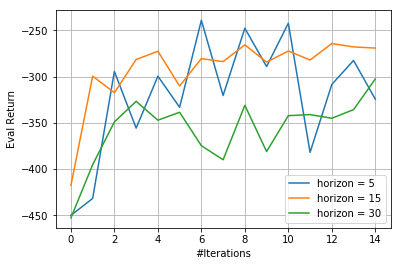

In [69]:
plt.plot(horizon5, label="horizon = 5")
plt.plot(horizon15, label="horizon = 15")
plt.plot(horizon30, label="horizon = 30")
plt.grid(True)
plt.legend()
plt.xlabel("#Iterations")
plt.ylabel("Eval Return")
plt.show()

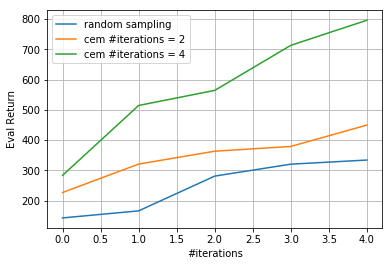

In [76]:
# problem 5
### cem 

_, cem2   = get_section_results("./data/hw2_q5_cheetah_cem_2_cheetah-ift6163-v0_17-02-2022_23-21-50")
_, cem4  = get_section_results("./data/hw2_q5_cheetah_cem_4_cheetah-ift6163-v0_17-02-2022_23-44-41")
_, rand  = get_section_results("./data/hw2_q5_cheetah_random_cheetah-ift6163-v0_17-02-2022_23-10-04")

plt.plot(rand, label="random sampling")
plt.plot(cem2, label="cem #iterations = 2")
plt.plot(cem4, label="cem #iterations = 4")
plt.legend()
plt.grid(True)
plt.xlabel("#iterations")
plt.ylabel("Eval Return")
plt.show()